# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

For this project, I selected the "Medical Appointment No Shows" dataset for analysis. The dataset was downloaded from Kaggle as a csv file.This dataset shows the information on patients who booked about 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
This analysis aims to find out reasons why some patients did not show up after making an appointment.
The following are the column names and their siginficance.
1. Patient ID - This indicates the identification number of the patient.

2. Appointment ID -This shows the identification number of the appointment made by the patient.

3. Gender - This is either of the two sexes (Male or Female) . The Female gender is in greater proportion because the female               takes more care of their health than the male individual.

4. Scheduled Day -This is the day the patients have to see the doctor.

5. Appointment Day - This is the day when the patients call to book a medical appointment.

6. Age - This is the length of time the patients has lived.

7. Neighbourhood - This indicates the location of the hospital where the appointment takes place.

8. Scholarship - This is the Bolsa Familia scholarship (Family allowance) which is the social welfare program of the Government                  of Brazil. It is either a patient is on this scholarship or not (True or False).

9. Hipertension - This tells us if the patient has a pre-existing health condition of hypertension or not (True or False).

10. Diabetes -  This tells us if the patient has diabetes as a pre-existing health condition or not (True or False).

11. Alcoholism - This indicates if a patient is able  or not able to control drinking due to both a physical and emotional                      dependence on alcohol (True or False).

12. Handicap - This indicates if a patient has a disadvantage resulting from impairment or disability that limits the social                  role of an individual (True or False).

13. SMS-received - This specifies if a patient received an appointment reminder via SMS on their phones or not (True or False).

14. No-show - This tells us whether a patient showed up for the appointment or not. "No" means the patient showed up and "yes" means the patient did not show up.

### Question(s) for Analysis 

1. What percentage of patients did not show up for their medical appointments?
2. Which gender showed up for medical appointments more?
3. Did patients with underlying health conditions miss their medical appointments more than patients without any underlying health condition?
4. Which day of the week do patients book appointments most?
5. Which day of the week has the most appointments?
6. Do people who receive an appointment reminder via sms still miss their appointments?
7. How many patients on scholarship missed their medical appointments?
8. Did patients with shorter wait days show up more?

In [1]:
#import neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


In [3]:
#read the csv file
df = pd.read_csv(r"C:\Users\ABIOLA\Documents\KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#inspect the data set
#shape of the data set
df.shape

(110527, 14)

In [5]:
#information about the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#description of the data set
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
#number of null values in each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
#number of duplicated rows in the data set
sum(df.duplicated())

0

In [10]:
#check the row with the minimum age which is incorrect
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


<AxesSubplot:>

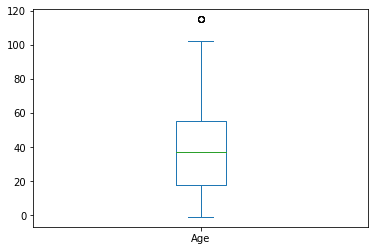

In [11]:
#plot a box plot for the age column to check for outliers
df['Age'].plot(kind = 'box')

In [12]:
#check the rows where the handicap column has values above 1. There are supposed to be 2 unique values but we have 5 unique values.
df[df['Handcap'] > 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


Inference
1. The data set as 110527 rows/observations and 14 columns/features.
2. There are no null values in the data set.
3. There are no duplicate rows.
4. There are incorrect data types in this dataset.The columns "ScheduledDay" and "AppointmentDay" are in object instead of datetime.
5. The column "Age" has a negative value which is out of normal range.
6. The column "Handcap" has 5 unique values instead of 2 unique values.




### Data Cleaning
 

In [13]:
#Rename the columns of the data set
df = df.rename(columns={'PatientId': 'Patient_id', 'AppointmentID':'Appointment_id', 'ScheduledDay':'Scheduled_day','AppointmentDay':'Appointment_day', 'Hipertension':'Hypertension','Handcap':'Handicap', 'No-show': 'No_show'})
df = df.rename(mapper =lambda x: x.lower(), axis = 1)

In [14]:
#the first five rows of the dataset with the renamed columns
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#rectify the columns with incorrect data types
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

The columns with an incorrect data type, "ScheduleDay", was changed to the correct data type which is datetime.

In [16]:
#Feature engineering on the scheduled_day column
#create a column that shows the day of week when the patient booked an appointment.
df["sch_day"] = df["scheduled_day"].dt.day_name()

In [17]:
#Feature engineering on the scheduled_day column
#create a column with shows the day of the week of the booked medical appointment
df["app_day"] = df["appointment_day"].dt.day_name()

In [18]:
#check the first 5 rows of the data set
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,sch_day,app_day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


In [19]:
# create a column that shows how long a patient has to wait before the appointment day
df['wait_days'] = df['appointment_day'].dt.date - df['scheduled_day'].dt.date
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,sch_day,app_day,wait_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0 days


In [20]:
#check the new column
df['wait_days']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: wait_days, Length: 110527, dtype: timedelta64[ns]

In [21]:
#change the data type into a string
df['wait_days'] = df['wait_days'].astype(str)

In [22]:
#extract only integer from the string
df['wait_days'] = df['wait_days'].str.extract('(-?\d+)').astype(int)

In [23]:
#description of the new column
df['wait_days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_days, dtype: float64

In [24]:
#check the wait days with negative values. This means patients were given incorrect appointment dates
mask = df['wait_days'] < 0 
mask2 = df['wait_days'] >= 0

In [25]:
#check the rows of the wait days with negative values
df[mask]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,sch_day,app_day,wait_days
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Tuesday,Monday,-1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Wednesday,Tuesday,-1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Thursday,Wednesday,-1
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Wednesday,Thursday,-6
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Wednesday,Tuesday,-1


In [26]:
#the patients who had wrong and right appointment dates
wrong_appointment = df[mask]
right_appointment = df[mask2]

In [27]:
#drop unimportant columns
columns_to_drop = ['patient_id', 'scheduled_day', 'appointment_id', 'appointment_day']
df.drop(columns_to_drop, axis = 1, inplace = True)

These columns were dropped because they were unimportant and will create bias in the data set.

In [28]:
#check the first 5 rows of the data set
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,sch_day,app_day,wait_days
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0


In [29]:
#The column age with values out of the normal range
mask3 = df['age'] < 0
df[mask3]

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,sch_day,app_day,wait_days
99832,F,-1,ROMÃO,0,0,0,0,0,0,No,Monday,Monday,0


In [30]:
#Remove the negative sign in row 99832
#df.drop(99832, inplace = True)
df[mask3] = df[mask3].replace(-1, 1)

In [31]:
#Check if the age in the row has been fixed
df[mask3]

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,sch_day,app_day,wait_days
99832,F,1,ROMÃO,0,0,0,0,0,0,No,Monday,Monday,0


In [32]:
df.iloc[99832]

gender                F
age                   1
neighbourhood     ROMÃO
scholarship           0
hypertension          0
diabetes              0
alcoholism            0
handicap              0
sms_received          0
no_show              No
sch_day          Monday
app_day          Monday
wait_days             0
Name: 99832, dtype: object

The row where the column "Age" has a value out of range, -1 was filtered out. The row shows that the patient showed up for the appointment. Instead of dropping the row, the negative sign was removed because the error could have been a negative addition error during data entry. The minimum value for the age column is 1 which implies that there are rows with age of 1.

In [33]:
df['handicap'] = df['handicap'].replace([2,3,4], 1)

In [34]:
mask4 = df['handicap'] > 1
df[mask4]

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,sch_day,app_day,wait_days


The column "handicap" has 5 unique values instead of 2 unique values. The 2 unique values indicates whether a patient is handicapped or not(0 = False and 1 = True). The addition of other unique values (2,3,4) could indicate the different types of handicaps or could be an error during data entry.So, these columns will be be replace with True(1).

<a id='eda'></a>
## Exploratory Data Analysis



### 1. What percentage of patients did not show up for their medical appointmnets?

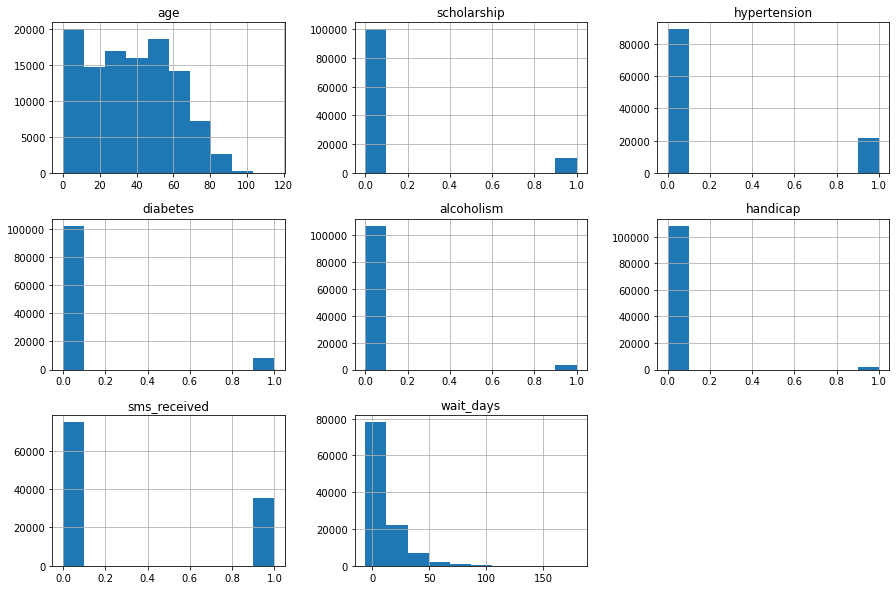

In [35]:
#distribution of the feature variables in the dataset
df.hist(figsize = (15,10));

The distribution of the age column and wait_days column appears to be skewed to the right.

In [36]:
#percentage of patients who showed up and who did not show up for their medical appointment
percent_no_show = df['no_show'].value_counts(normalize = True)
percent_no_show

No     0.798067
Yes    0.201933
Name: no_show, dtype: float64

In [37]:
def label_1(x, y, t):
    """
    Args:
    x (str): x-axis title
    y (str): y-axis title
    t (str): main title
        
    Returns:
    None
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

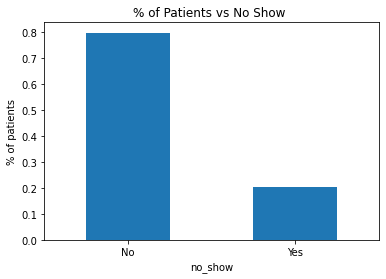

In [38]:
#plotting a bar chart showing the percentage of patients who showed up and who did not show up for their medical appointment
percent_no_show.plot(kind = 'bar', rot = 360)
label_1('no_show','% of patients', '% of Patients vs No Show ');

20.2% of patients who booked a medical appointment did not show up.

### 2. Which gender showed up for their medical appointment more?

In [39]:
# percentages of the male and female patients
df['gender'].value_counts(normalize = True)

F    0.649977
M    0.350023
Name: gender, dtype: float64

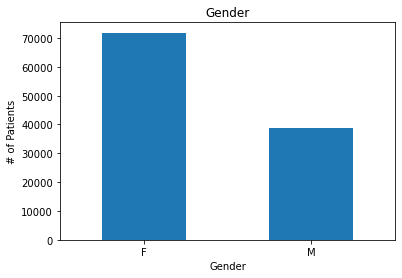

In [40]:
# bar chart showing the percentages of the male and female patients
df['gender'].value_counts().plot(kind = 'bar', rot = 360)
label_1('Gender','# of Patients','Gender');

65% female patients and 35% male patients booked a medical appointment.

In [41]:
gender_no_show = df.groupby('no_show')['gender'].value_counts(normalize = True)
gender_no_show

no_show  gender
No       F         0.648989
         M         0.351011
Yes      F         0.653882
         M         0.346118
Name: gender, dtype: float64

In [42]:
def label_2(y, l, t):
    """
    Args:
    y (str): y-axis title
    l (str): legend
    t (str): main title
    
    Returns:
    None
    """
    plt.ylabel(y)
    plt.legend(l)
    plt.title(t)
    plt.show()

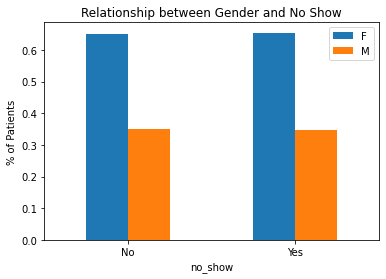

In [43]:
gender_no_show.unstack().plot(kind = 'bar', rot = 360)
label_2('% of Patients',['F', 'M'],'Relationship between Gender and No Show');

The female gender (64.9%) showed up more than the male gender(35.1%). This is because female patients take care of their health more than male patients.

### 3. Did patients with underlying health conditions miss their appointments more than patients without any underliying health conditions?

In [44]:
#percentages of patients with and without hypertension
hypertension = df['hypertension'].value_counts(normalize = True)
hypertension

0    0.802754
1    0.197246
Name: hypertension, dtype: float64

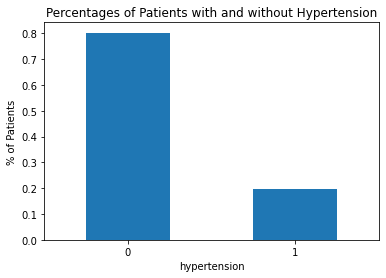

In [45]:
#bar chart of the percentages of patients with and without hypertension
hypertension.plot(kind = 'bar', rot = 360)
label_1('hypertension','% of Patients', 'Percentages of Patients with and without Hypertension');

There are more patients without hypertension(80.3%) and less patients with hypertension(19.7%)

In [46]:
hypertension_no_show = df.groupby('no_show')['hypertension'].value_counts(normalize = True)
hypertension_no_show

no_show  hypertension
No       0               0.795608
         1               0.204392
Yes      0               0.830996
         1               0.169004
Name: hypertension, dtype: float64

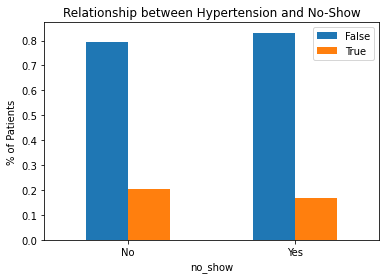

In [47]:
hypertension_no_show.unstack().plot(kind = 'bar', rot = 360)
label_2('% of Patients',['False', 'True'],'Relationship between Hypertension and No-Show');

Patients without hypertension still missed their medical appointments (83.09%) more than patients with hypertension(16.9%). Patients without hypertension showed up more (79.56%) than patients with hypertension(20.44%).
Therefore, patients without hypertension are more likely to show up for their appointment.

In [48]:
#percentages of patients with and without diabetes
diabetes = df['diabetes'].value_counts(normalize = True)
diabetes

0    0.928135
1    0.071865
Name: diabetes, dtype: float64

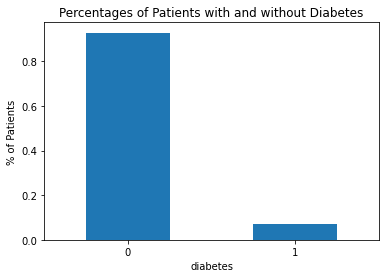

In [49]:
#bar chart of the percentages of patients with and without diabetes
diabetes.plot(kind = 'bar', rot = 360)
label_1('diabetes', '% of Patients', 'Percentages of Patients with and without Diabetes');

There are more patients without diabetes(92.8%) and less patients with diabetes(7.2%)

In [50]:
diabetes_no_show = df.groupby('no_show')['diabetes'].value_counts(normalize = True)
diabetes_no_show

no_show  diabetes
No       0           0.926163
         1           0.073837
Yes      0           0.935929
         1           0.064071
Name: diabetes, dtype: float64

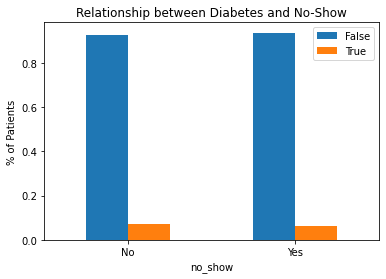

In [51]:
diabetes_no_show.unstack().plot(kind = 'bar', rot = 360)
label_2('% of Patients', ['False', 'True'],'Relationship between Diabetes and No-Show');

Patients without diabetes missed their medical appointments (83.09%) more than patients with diabetes(16.9%). Patients without diabetes showed up more (92.6%) than patients with diabetes(7.4%).
Therefore, patients without diabetes are more likely to show up for their appointment.

In [52]:
#percentages of patients with and without alcoholism
alcoholism = df['alcoholism'].value_counts(normalize = True)
alcoholism

0    0.9696
1    0.0304
Name: alcoholism, dtype: float64

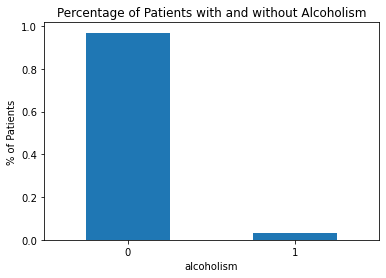

In [53]:
#bar chart of the percentages of patients with and without alcoholism
alcoholism.plot(kind = 'bar', rot = 360)
label_1('alcoholism', '% of Patients', 'Percentage of Patients with and without Alcoholism');

There are more patients without alcoholism(96.9%) and less patients with alcoholism(3%)

In [54]:
alcoholism_no_show = df.groupby('no_show')['alcoholism'].value_counts(normalize = True)
alcoholism_no_show

no_show  alcoholism
No       0             0.969583
         1             0.030417
Yes      0             0.969667
         1             0.030333
Name: alcoholism, dtype: float64

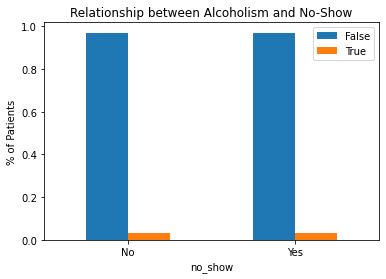

In [55]:
alcoholism_no_show.unstack().plot(kind = 'bar', rot = 360)
label_2(('% of Patients'), ['False', 'True'], 'Relationship between Alcoholism and No-Show');

Patients without alcoholism missed their medical appointments (96.97%) more than patients with alcoholism(3.07%). Patients without alcoholism showed up more (96.96%) than patients with alcoholism(3.04%).
Therefore, patients without alcoholism are more likely to show up for their appointment.

In [56]:
#percentages of handicapped and non-handicapped patients
handicap = df['handicap'].value_counts(normalize = True)
handicap

0    0.979724
1    0.020276
Name: handicap, dtype: float64

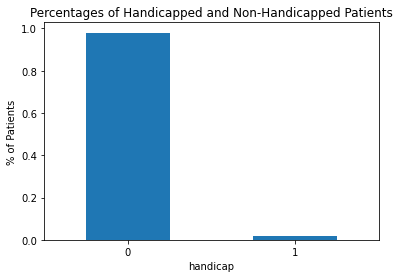

In [57]:
#bar chart of the percentages of handicapped and non-handicapped patients
handicap.plot(kind = 'bar', rot = 360)
label_1('handicap', '% of Patients','Percentages of Handicapped and Non-Handicapped Patients');

There are more patients that are not handicapped(98%) and less patients that are handicapped(2%)

In [58]:
handicap_no_show = df.groupby('no_show')['handicap'].value_counts(normalize = True)
handicap_no_show

no_show  handicap
No       0           0.979208
         1           0.020792
Yes      0           0.981764
         1           0.018236
Name: handicap, dtype: float64

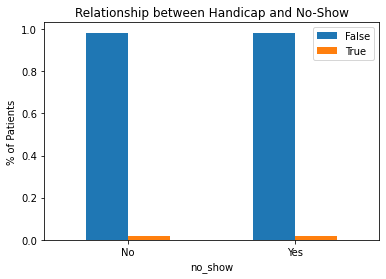

In [59]:
handicap_no_show.unstack().plot(kind = 'bar', rot = 360)
label_2('% of Patients', ['False', 'True'],'Relationship between Handicap and No-Show');

Non-handicapped patients missed their medical appointments (98.18%) more than handicapped patients(1.82%). Non-handicapped patients showed up more (97.9%) than handicapped patients (2.08%).
Therefore, non-handicapped patients are more likely to show up for their appointment.


#### Finally, we can conclude that patients with underlying health conditions such as hypertension, diabetes, alcoholism, and handicap are more like to miss their appointments.

### 4. Which day of the week do patients book appointments most?

In [60]:
#number of patients who book appointments on each day of the week
scheduled_day = df['sch_day'].value_counts()
scheduled_day

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: sch_day, dtype: int64

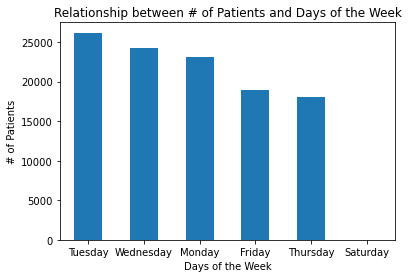

In [61]:
#bar chart of the number of patients who book appointments on each day
scheduled_day.plot(kind = 'bar', rot = 360)
label_1('Days of the Week','# of Patients','Relationship between # of Patients and Days of the Week');

Most patients (26168 patients) book a medical appointment on Tuesday.Few patients(24 patients) book a medical appointment on Saturday.

### 5. Which day of the week has the most appointments?

In [62]:
#number of fixed appointments per day of the week 
app_number_per_day = df['app_day'].value_counts()
app_number_per_day

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: app_day, dtype: int64

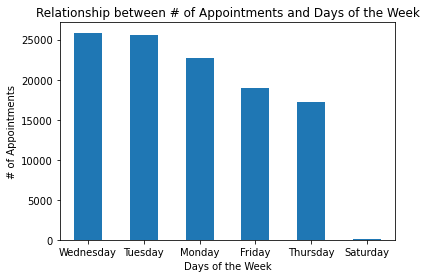

In [63]:
# bar chart of the number of fixed appointments per day of the week 
app_number_per_day.plot(kind = 'bar', rot = 360)
label_1('Days of the Week', '# of Appointments', 'Relationship between # of Appointments and Days of the Week');

Most medical appointment are fixed on Wednesdays with 25867 patients.Few medical appointments are fixed on Saturdays with 39 patients.

### 6. Do patients who receive an appointment reminder via sms still miss their appointment?

In [64]:
#percentage of patients who received sms and did not receive sms 
sms = df['sms_received'].value_counts(normalize = True)
sms

0    0.678974
1    0.321026
Name: sms_received, dtype: float64

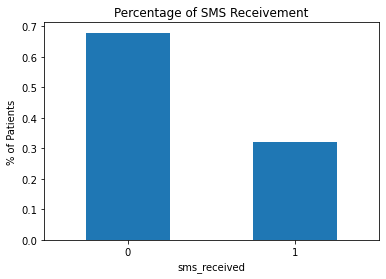

In [65]:
#bar chart of the percentage of patients who received sms and did not receive sms
sms.plot(kind = 'bar', rot = 360)
label_1('sms_received', '% of Patients', 'Percentage of SMS Receivement');

67.9% of patients did not receive SMS while 32.1% of patients received SMS.

In [66]:
#percentage of the relationship between sms and no show
sms_no_show = df.groupby('sms_received')['no_show'].value_counts(normalize = True)
sms_no_show

sms_received  no_show
0             No         0.832967
              Yes        0.167033
1             No         0.724255
              Yes        0.275745
Name: no_show, dtype: float64

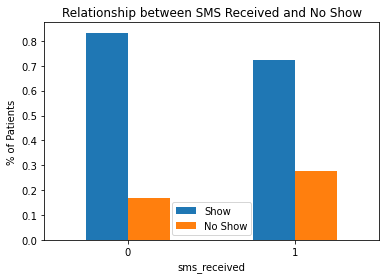

In [67]:
#bar chart of the relationship between sms and no_show
sms_no_show.unstack().plot(kind = 'bar', rot = 360);
label_2('% of Patients', ['Show', 'No Show'], 'Relationship between SMS Received and No Show');

27.5% of patients who received SMS still missed their appointment. Patients who did not receive SMS are more likely to show up for their appointments.

### 7. How many patients on scholarship missed their medical appointment?

In [68]:
#number of patients on scholarship and not on scholarship
scholarship = df['scholarship'].value_counts()
scholarship

0    99666
1    10861
Name: scholarship, dtype: int64

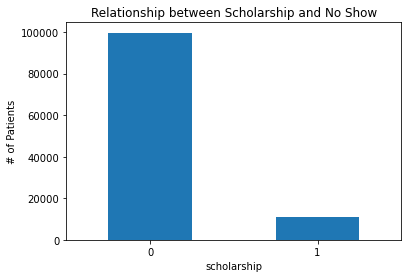

In [69]:
#bar chart of the number of patient on scholarship and not on scholarship
scholarship.plot(kind = 'bar', rot = 360)
label_1('scholarship', '# of Patients', 'Relationship between Scholarship and No Show');

In [70]:
#number of patients that showed up or did not show up grouped by patients on and not on scholarship
sch_no_show = df.groupby('scholarship')['no_show'].value_counts()
sch_no_show

scholarship  no_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: no_show, dtype: int64

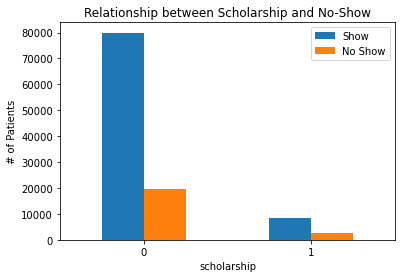

In [71]:
#relationship  between scholarship and no show columns
sch_no_show.unstack().plot(kind = 'bar', rot = 360);
label_2('# of Patients', ['Show', 'No Show'], 'Relationship between Scholarship and No-Show');

Out of 10861 patients on scholarship,only 8283 patients showed up for their medical appointments. 2578 patients did not show up for their appointments.
Meanwhile, 79925 patients not on scholarship showed up for their medical appointments and 19741 patients not on scholarship did not show up.
Therefore, patients not on scholarship are likely to miss their medical appointments.

### 8. Did patients with shorter wait days show up more ?

In [72]:
#median of wait dayys
df['wait_days'].median()

4.0

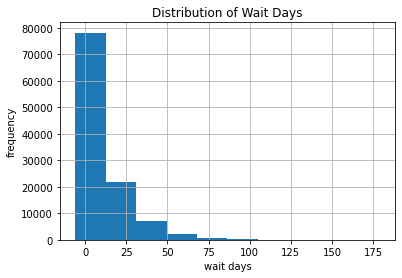

In [73]:
#plot the distribution of wait days
df['wait_days'].hist()
label_1('wait days', 'frequency','Distribution of Wait Days');

The median on wait days was found to be 4. There are outliers in this column so the mean was not computed.

In [74]:
#the patients who had wrong appointment dates
wrong_appointment = df[mask]
wrong_appointment['no_show'].value_counts()

Yes    5
Name: no_show, dtype: int64

In [75]:
#number of patients that showed up and did not show up
show = df[df['no_show'] == 'No']
no_show = df[df['no_show'] == 'Yes']

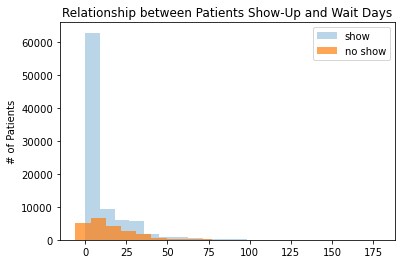

In [76]:
#the relationship between the no_show and wait days
show['wait_days'].plot(kind = 'hist', bins = 20, alpha = 0.3)
no_show['wait_days'].plot(kind = 'hist', bins = 20, alpha = 0.7)
label_2('# of Patients',['show', 'no show'], 'Relationship between Patients Show-Up and Wait Days');

The histogram shows that more patients with shorter wait days show up more than patients with longer wait days 

<a id='conclusions'></a>
## Conclusions


The following are the summary of the findings and results that have been performed in relation to the questions provided at the beginnning of the analysis.

1. The data set as 110527 rows/observations and 14 columns/features with no null values and no duplicate rows.

2. There are incorrect data types in this dataset.The columns "ScheduledDay" and "AppointmentDay" are in object instead of datetime. These data types were changed to datetime.

3. The column "Age" has a negative value which is out of normal range.Instead of dropping the row where the age has a negative value, the negative value was replaced with a positive number.

4. The column "Handcap" has 5 unique values instead of 2 unique values.The 2 unique values indicates whether a patient is handicapped or not(0 = False and 1 = True). The addition of other unique values (2,3,4) could indicate the different types of handicaps or could be an error during data entry.So,these values were replaced with True(1).

5. 20.2% of patients who booked a medical appointment did not show up.

6. 65% female patients and 35% male patients booked a medical appointment.The female gender (64.9%) showed up more than the male gender(35.1%). This is because female patients take care of their health more than male patients. So, the female gender are more likely to show up.

7. There are less patients with underlying health conditions who booked a medical appointment. Patients with underlying health conditions such as hypertension, diabetes, alcoholism, and handicap are more like to miss their appointments.

8. Medical appointments are most likely fixed on Wednesdays. Medical appointments are less likely fixed on Saturdays.

9. 67.9% of patients did not receive SMS while 32.1% of patients received SMS.Patients who did not receive SMS are more likely to show up for their appointments.

10. Patients that are not on scholarship are likely to miss their medical appointments.

11. Patients with longer wait days are less likely to show up for medical appointments.

Additional research can be done at the following points

1. The duration each patient has to wait before their medical appointment.
2. The health insurance coverage.
3. More patients.

Limitations of my exploration on this dataset are:

1. The column "Age" has a negative value which is out of normal range.Instead of dropping the row where the age has a negative value, the negative value was replaced with a positive number. 
2. 5 patients were booked for an appointment on days before the scheduled day and did not show up.
3. There were 5 unique values in the handicap columns instead of 2. The values greater than 1 were replaced with 1.

In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Medical_Appointment_No_Shows.ipynb'])

1